In [1]:
import pandas as pd
train = pd.read_csv('trainingData.csv')
validation = pd.read_csv('validationData.csv')

In [2]:
train_normalize = train.copy()
validation_normalize = validation.copy()

In [3]:
def create_target_variable(X): #Function to create new target variable which identifies building and floor uniquely
    X['Build_Floor'] = X['BUILDINGID']*10 + X['FLOOR']
    return X

In [4]:
train = create_target_variable(train)
validation = create_target_variable(validation)
train_normalize = create_target_variable(train_normalize)
validation_normalize = create_target_variable(validation_normalize)

# Normalize

In [5]:
def normalize(X): #Normalize feature Variables
    for i in X.columns[:520]:
        X[i]=X[i]+105
        X.loc[X[i]==205,[i]] = 0
        X[i] = X[i]/105
    return X

In [7]:
train_normalize = normalize(train_normalize) #train data is normalised
validation_normalize = normalize(validation_normalize) #validation data is normalised

In [69]:
validation_normalize.loc[validation_normalize['BUILDINGID']==2]['FLOOR'].unique()

array([4, 2, 3, 0, 1])

In [70]:
validation_normalize.loc[validation_normalize['BUILDINGID']==0]['FLOOR'].unique()

array([2, 1, 0, 3])

In [55]:
train_normalize['Build_Floor'].unique()

array([12,  0, 23, 22, 24, 10, 11, 21, 13, 20,  2,  1,  3])

In [71]:
validation_normalize['Build_Floor'].unique()

array([11, 24,  2, 22, 23, 20, 21, 13,  1, 12,  0, 10,  3])

In [9]:
train_X_normalised = train_normalize.iloc[:,:520] #selecting feature variables of normalised train data
train_X_normalised 
train_Y_normalised =  train_normalize.iloc[:,529] #selecting target varaible of normalised train data
train_Y_normalised

0        12
1        12
2        12
3        12
4         0
         ..
19932    13
19933    21
19934    13
19935    13
19936    13
Name: Build_Floor, Length: 19937, dtype: int64

In [73]:
train_X_normalised

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07619,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_X = train.iloc[:,:520] #selecting feature variables of train data
train_X
train_Y = train.iloc[:,529] #selecting target varaible of train data
train_Y

0        12
1        12
2        12
3        12
4         0
         ..
19932    13
19933    21
19934    13
19935    13
19936    13
Name: Build_Floor, Length: 19937, dtype: int64

In [12]:
train_X

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
19933,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
19934,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
19935,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [13]:
validation_X = validation.iloc[:,:520] #selecting feature variables of validation data
validation_X
validation_Y =  validation.iloc[:,529] #selecting target varaible of validation data
validation_Y

0       11
1       24
2       24
3       24
4        2
        ..
1106    23
1107    23
1108     0
1109     0
1110     0
Name: Build_Floor, Length: 1111, dtype: int64

In [14]:
validation_X

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1108,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1109,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [15]:
validation_X_normalised = validation_normalize.iloc[:,:520] #selecting feature variables of normalised validation data
validation_X_normalised
validation_Y_normalised =  validation_normalize.iloc[:,529] #selecting target varaible of normalised validation data
validation_Y_normalised

0       11
1       24
2       24
3       24
4        2
        ..
1106    23
1107    23
1108     0
1109     0
1110     0
Name: Build_Floor, Length: 1111, dtype: int64

# Part 2

# Linear SVC

In [16]:
from sklearn.svm import LinearSVC

In [109]:
result = pd.DataFrame(columns = ['Model','Type','Accuracy']) #store the result of the predictions
result

,Model,Type,Accuracy


In [110]:
def LSVC(X,Y,X_Val): #create Linear SVC model
    model = LinearSVC()
    model.fit(X, Y)
    return model.predict(X_Val)

 Normalize Linear SVC

In [111]:
pred = LSVC(train_X_normalised,train_Y_normalised,validation_X_normalised) #predict 

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(validation_Y_normalised, pred) #score

0.8982898289828983

In [113]:
result = result.append({'Model':'Linear SVC', 'Type': 'Normalised', 'Accuracy': accuracy_score(validation_Y_normalised, pred)},ignore_index = True)

In [114]:
result

,Model,Type,Accuracy
0,Linear SVC,Normalised,0.89829


Without Normalization

In [115]:
pred = LSVC(train_X,train_Y,validation_X)
from sklearn.metrics import accuracy_score
accuracy_score(validation_Y, pred)

/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6273627362736274

In [116]:
result = result.append({'Model':'Linear SVC', 'Type': 'Not Normalised', 'Accuracy': accuracy_score(validation_Y, pred)},ignore_index = True)

In [117]:
result

,Model,Type,Accuracy
0,Linear SVC,Normalised,0.898290
1,Linear SVC,Not Normalised,0.627363


# Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
def Logistic_Reg(X,Y,X_Val):
    model = LogisticRegression()
    model.fit(X, Y)
    return model.predict(X_Val)

Normalised Logistic Regression

In [120]:
pred = Logistic_Reg(train_X_normalised,train_Y_normalised,validation_X_normalised)
accuracy_score(validation_Y_normalised, pred)

/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9072907290729073

In [121]:
result = result.append({'Model':'Logistic Regression', 'Type': 'Normalised', 'Accuracy': accuracy_score(validation_Y_normalised, pred)},ignore_index = True)

Without normalization

In [122]:
pred = Logistic_Reg(train_X,train_Y,validation_X)
accuracy_score(validation_Y, pred)

/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7911791179117912

In [123]:
result = result.append({'Model':'Logistic Regression', 'Type': 'Not Normalised', 'Accuracy': accuracy_score(validation_Y, pred)},ignore_index = True)
result

,Model,Type,Accuracy
0,Linear SVC,Normalised,0.898290
1,Linear SVC,Not Normalised,0.627363
2,Logistic Regression,Normalised,0.907291
3,Logistic Regression,Not Normalised,0.791179


# KNN Classifier

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
def KNN(X,Y,X_Val):
    model = KNeighborsClassifier(n_neighbors = 5)
    model.fit(X, Y)
    return model.predict(X_Val)

Normalized KNN

In [126]:
pred = KNN(train_X_normalised,train_Y_normalised,validation_X_normalised)
accuracy_score(validation_Y_normalised, pred)

0.9000900090009001

In [127]:
result = result.append({'Model':'KNN Classifier', 'Type': 'Normalised', 'Accuracy': accuracy_score(validation_Y_normalised, pred)},ignore_index = True)


Without Normalization

In [128]:
pred = KNN(train_X,train_Y,validation_X)
accuracy_score(validation_Y, pred)

0.729072907290729

In [129]:
result = result.append({'Model':'KNN Classifier', 'Type': 'Not Normalised', 'Accuracy': accuracy_score(validation_Y, pred)},ignore_index = True)
result

,Model,Type,Accuracy
0,Linear SVC,Normalised,0.898290
1,Linear SVC,Not Normalised,0.627363
2,Logistic Regression,Normalised,0.907291
3,Logistic Regression,Not Normalised,0.791179
4,KNN Classifier,Normalised,0.900090
5,KNN Classifier,Not Normalised,0.729073


# SVC

In [130]:
from sklearn.svm import SVC

In [131]:
def svc(X,Y,X_Val):
    model = SVC()
    model.fit(X, Y)
    return model.predict(X_Val)

Normalized SVC

In [132]:
pred = svc(train_X_normalised,train_Y_normalised,validation_X_normalised)
accuracy_score(validation_Y_normalised, pred)

0.9225922592259226

In [133]:
result = result.append({'Model':'SVC', 'Type': 'Normalised', 'Accuracy': accuracy_score(validation_Y_normalised, pred)},ignore_index = True)


Without Normalization

In [134]:
pred = svc(train_X,train_Y,validation_X)
accuracy_score(validation_Y, pred)

0.8082808280828083

In [135]:
result = result.append({'Model':'SVC', 'Type': 'Not Normalised', 'Accuracy': accuracy_score(validation_Y, pred)},ignore_index = True)
result

,Model,Type,Accuracy
0,Linear SVC,Normalised,0.898290
1,Linear SVC,Not Normalised,0.627363
2,Logistic Regression,Normalised,0.907291
3,Logistic Regression,Not Normalised,0.791179
4,KNN Classifier,Normalised,0.900090
5,KNN Classifier,Not Normalised,0.729073
6,SVC,Normalised,0.922592
7,SVC,Not Normalised,0.808281


# Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
def RF(X,Y,X_Val):
    model = RandomForestClassifier()
    model.fit(X, Y)
    return model.predict(X_Val)

Normalized Random Forest

In [138]:
pred = RF(train_X_normalised,train_Y_normalised,validation_X_normalised)
accuracy_score(validation_Y_normalised, pred)

0.9072907290729073

In [139]:
result = result.append({'Model':'Random Forest', 'Type': 'Normalised', 'Accuracy': accuracy_score(validation_Y_normalised, pred)},ignore_index = True)


Without Normalization

In [140]:
pred = RF(train_X,train_Y,validation_X)
accuracy_score(validation_Y, pred)

0.8712871287128713

In [141]:
result = result.append({'Model':'Random Forest', 'Type': 'Not Normalised', 'Accuracy': accuracy_score(validation_Y, pred)},ignore_index = True)
result

,Model,Type,Accuracy
0,Linear SVC,Normalised,0.898290
1,Linear SVC,Not Normalised,0.627363
2,Logistic Regression,Normalised,0.907291
3,Logistic Regression,Not Normalised,0.791179
4,KNN Classifier,Normalised,0.900090
5,KNN Classifier,Not Normalised,0.729073
6,SVC,Normalised,0.922592
7,SVC,Not Normalised,0.808281
8,Random Forest,Normalised,0.907291
9,Random Forest,Not Normalised,0.871287


# SGDC Classifier

In [142]:
from sklearn.linear_model import SGDClassifier

In [143]:
def SGDC(X,Y,X_Val):
    model = SGDClassifier()
    model.fit(X, Y)
    return model.predict(X_Val)

Normalized SGDC

In [144]:
pred = SGDC(train_X_normalised,train_Y_normalised,validation_X_normalised)
accuracy_score(validation_Y_normalised, pred)

0.8964896489648965

In [145]:
result = result.append({'Model':'SGDC', 'Type': 'Normalised', 'Accuracy': accuracy_score(validation_Y_normalised, pred)},ignore_index = True)


Without Normalization

In [146]:
pred = SGDC(train_X,train_Y,validation_X)
accuracy_score(validation_Y, pred)

0.6885688568856886

In [147]:
result = result.append({'Model':'SGDC', 'Type': 'Not Normalised', 'Accuracy': accuracy_score(validation_Y, pred)},ignore_index = True)
result

,Model,Type,Accuracy
0,Linear SVC,Normalised,0.898290
1,Linear SVC,Not Normalised,0.627363
2,Logistic Regression,Normalised,0.907291
3,Logistic Regression,Not Normalised,0.791179
4,KNN Classifier,Normalised,0.900090
5,KNN Classifier,Not Normalised,0.729073
6,SVC,Normalised,0.922592
7,SVC,Not Normalised,0.808281
8,Random Forest,Normalised,0.907291
9,Random Forest,Not Normalised,0.871287


# As evident, SVC with normalized data gives the best accuracy

# Part 3

In [168]:
df_20 = train_normalize.sample(frac = 0.2) #how we are taking 20% of the train data
df_20

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Build_Floor
12142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7384.729100,4.864840e+06,4,2,102,2,13,17,1371722057,24
12484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7489.919800,4.864902e+06,0,1,6,2,13,17,1371714569,10
6467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7322.587600,4.864821e+06,0,2,103,2,10,8,1371722232,20
19640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7536.409200,4.864935e+06,3,1,104,2,18,10,1371709462,13
6138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7411.353136,4.864803e+06,0,2,201,1,9,14,1371720022,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7682.084400,4.864931e+06,2,0,227,2,11,13,1370339228,2
9734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7386.640259,4.864846e+06,2,2,102,1,11,13,1371722088,22
13208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7337.527900,4.864826e+06,3,2,121,2,14,7,1371723429,23
16469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7616.946200,4.864980e+06,2,0,115,2,1,14,1371052519,2


In [169]:
def svc(X,Y,X_Val): #SVC Model
    model = SVC()
    model.fit(X, Y)
    return model.predict(X_Val)

def df_increase_size(X,percent): #Function that divides the data based on the fraction provided to calculate the accuracy
    a = 0
    for i in range(3): #loop to run it thrice and take it's average 
        New_train = X.sample(frac = percent)
        New_train_X = New_train.iloc[:,:520]
        New_train_Y = New_train.iloc[:,529]
        model = SVC()
        model.fit(New_train_X, New_train_Y)
        pred = model.predict(validation_X_normalised)
        a = a + accuracy_score(validation_Y_normalised, pred)
    return a/3 #calculate mean of three

In [164]:
p = pd.DataFrame()
p = p.append({'Volume': 0.2, 'Prediction' : df_increase_size(train_normalize,0.2)}, ignore_index = True)
p = p.append({'Volume': 0.4, 'Prediction' : df_increase_size(train_normalize,0.4)}, ignore_index = True)
p = p.append({'Volume': 0.6, 'Prediction' : df_increase_size(train_normalize,0.6)}, ignore_index = True)
p = p.append({'Volume': 0.8, 'Prediction' : df_increase_size(train_normalize,0.8)}, ignore_index = True)
p = p.append({'Volume': 1, 'Prediction' : df_increase_size(train_normalize,1)}, ignore_index = True)

In [165]:
p #prediction of the volume of data

,Prediction,Volume
0,0.909991,0.2
1,0.919292,0.4
2,0.921092,0.6
3,0.921692,0.8
4,0.922592,1.0


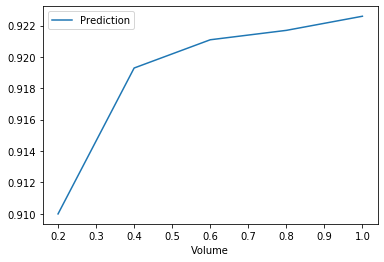

In [167]:
p.plot(x = 'Volume', y = 'Prediction' )